# Final project II: Portfolio optimization

We consider the problem of choosing a long term stock portfolio, given a set of stocks and their price over some period under risk aversion parameter $\gamma >0$.

Assume there are $m$ stocks to be considered. The portfolio will be represented by a column vector $w \in \mathbb{R}^m$, such that $\sum_{i=1}^m w_i = 1$. If $w_i > 0$, you use a fraction $w_i$ of your total money to buy the i'th stock, while $w_i < 0$ represent shorting that stock. In both cases we assume the stock is bought/shorted for the entire period.

Let $p_{j,i}$ represent the price of the i'th stock at time step j. If there are $n + 1$ time steps, then $p \in \mathbb{R} ℝ^{(n+1)\times m}$ is a matrix.

We let $r \in \mathbb{R}^{n \times m} $ be the matrix, where $r_{j,i}$ represents the fractional reward of stock i at time step j, i.e. $r_{j,i} = \frac{p_{j+1,i} − p_{j,i}}{ p_{j,i}} for $1 \leq j \leq n$.

By $r_j$ we denote the j'th row of r, viewed as a column vector $(r_{j,1}, ..., r_{j,m})^T.

We make the (unrealistic) assumption that we can model r by a random variable, distributed as a multivariate Gaussian, with estimated means

$$\mu \approx \frac{1}{n}\cdot \sum_{i=1}^n r_j$$

and estimated covariance matrix



$$\Sigma \approx \frac{1}{n} \cdot \sum_{i=1}^n (r_j-\mu)(r_j-\mu)^T$$

Note that $\mu_i$ and $\Sigma_{i,i}$ are the estimated mean and variance for stock i.

The distribution of returns using some $w$ is then

$$R_w = N(\mu_w, \sigma_w^2)$$

$$\mu_w = w^T\mu$$

$$\sigma_w^2 = w^T\Sigma w$$

Now, we want to maximize for a balance between high return $\mu_w$ and low risk $\sigma_w^2$. This leads to the following optimization problem, where we want to find the value $w^{\star}$ of $w$ maximizing the following expresion:

\begin{align}
    \text{maximize }&  w_T \mu − \gamma w_T \Sigma w \\
    \text{subject to}&   \sum_{i=1}^m w_i =1 
\end{align}

where $\gamma$ controls the balance between risk and return. A high value of $\gamma$ indicate we are willing to take low risk and vise versa.

In this project you should find $w^{\star}$ for different values of $\gamma$ and using real stock values of your choice. The project consists of the following three questions.

We need a module for collecting stock values. For this you can use the module pandas-datareader. Using this you should write a function get_prices([stock1, ..., stockk], step_size, period) that returns a tuple (stocks, p), where p[j, i] represents the opening price of stock i at time step j and stocks[i] is the name of the i'th stock (adjust the arguments to get_prices to the data available at your data source). Make a plot of p, where each stock is labeled with its name, e.g. MSFT or GOGL. You should use at least five stocks.

Calculate r, $\mu$ and $\Sigma$ using the formulas above and the p calculated in the first question. Plot the probability density function (pdf) of the return of each stock.
Hint. The method norm.pdf from the module scipy.stats might become convenient.

Solve the optimization problem defined above for different values of $\gamma$, e.g. gammas = (np.arange(10) / 5) + 1, and plot the pdf of each solution to a single plot with appropriate legends. Finally create a scatter plot of how $w^{\star}$ changes as $\gamma$ changes. For each value of $\gamma$ plot the fraction of each stock in the portfolio.


p =
 Symbols        MSFT     GOGL   FLWS      GOOG    UHAL     AAPL
Date                                                          
2014-04-25   34.735  44.3210   5.70   522.510  240.40   17.962
2015-04-27   41.822  18.1890  11.38   563.120  314.25   30.025
2016-04-26   47.538   2.9829   8.00   725.420  339.76   24.019
2017-04-26   63.549   5.5091  10.60   874.230  362.87   34.100
2018-04-26   89.158   5.8107  12.65  1029.510  342.37   39.351
2019-04-29  125.890   4.3790  19.26  1274.000  374.39   49.758
2020-04-28  172.410   2.8561  17.50  1287.930  277.09   70.303
2021-04-28  254.000   6.7801  24.40  2407.145  600.67  133.510
mu = 
 [0.33360553 0.03653779 0.29190134 0.2665873  0.20018755 0.37452553]
sigma = 
 [[ 0.14866572 -0.00436918 -0.06765847 -0.02371035  0.04155501 -0.00337514
  -0.0911076 ]
 [-0.00436918  0.21309737 -0.10553618  0.02625669  0.02441587  0.08302156
  -0.23688613]
 [-0.06765847 -0.10553618  0.09729561  0.00587775 -0.03006788 -0.03510691
   0.13519606]
 [-0.02371035

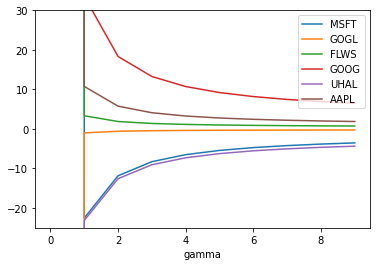

In [8]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.optimize import minimize

# (1)
def get_prices(stocks, step_size, period):
    '''
    Denne funktion er for sej og godt struktureret
    '''
    data = pdr.stooq.StooqDailyReader(stocks, start=period[0], end=period[1]).read()['Open']
    return tuple(stocks), data.iloc[::-step_size]


# Variable som bruges til at hente ønskede aktiekurser
stocks = ['MSFT', 'GOGL', 'FLWS', 'GOOG', 'UHAL', 'AAPL']
step_size = 252
start_date = '2014-04-25'
end_date = '2022-04-25'
period = [start_date, end_date]

# Plot kursudvikling
data = get_prices(stocks, step_size, period)
p = data[1]
print('p =\n', p)
#p.plot()
#plt.legend()
#plt.show()


# (2)
# Beregning af r-matrice som indeholder afkast
p_matrix = p.to_numpy()
r = []
for i in range(len(p_matrix)-1):
    r.append((p_matrix[i+1]-p_matrix[i])/p_matrix[i])
#print('r = \n', r)

# mu er en vektor med forventet afkast for hver aktie
mu = np.sum(r, axis=0)/len(r)
print('mu = \n', mu)

# kan ikke få dette til at virke. Dette skulle gerne være en matrice?
sigma = ((r-mu) @ np.transpose(r-mu))/len(r)
print('sigma = \n', sigma)

# covariance matrice fundet på en anden måde
r = pd.DataFrame(data=r, columns=stocks)
cov = r.cov()
print('cov = \n', cov)
# np.transpose(matrix)
#returns = np.log(p).diff()
#print(returns)

# Plot PDF for hver akties afkast. Antaget at afkast følger normalfordeling
x = np.linspace(-0.3, 0.5, 1000)
y = [norm.pdf(x, mu[i], np.sqrt(cov.iloc[i][i])) for i in range(len(stocks))]

pdf = dict(zip(stocks, y))
pdf['x'] = x
df = pd.DataFrame(pdf).set_index('x')
#print('df =\n', df)
#df.plot()
#plt.legend()
#plt.show()

# (3)
w_init = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])
cons = ({'type': 'eq', 'fun': lambda w:  sum(w)-1})

x = np.linspace(0.0, 3.0, 1000)
results = {}
gamma_udvikling = []
w_udvikling = []
for gamma in range(0, 10):
    obj_func = lambda w: -(w @ np.transpose(mu) - gamma * (w @ cov @ np.transpose(w)))
    res = minimize(fun=obj_func, x0=w_init, constraints=cons)
    w = res.x
    mu_w = w @ np.transpose(mu)
    var_w = w @ cov @ np.transpose(w)
    # print('afkast =', mu_w, 'var = ', var_w)
    results['gamma = ' + str(gamma)] = norm.pdf(x, mu_w, np.sqrt(var_w))
    gamma_udvikling.append(gamma)
    w_udvikling.append(w)

# Nedenstående plotter PDF for hvert gamma
'''results['x'] = x
results = pd.DataFrame(results).set_index('x')
results.plot()
plt.legend()
plt.show()'''

udvikling = dict(zip(stocks, np.transpose(w_udvikling)))
udvikling['gamma'] = gamma_udvikling
udvikling = pd.DataFrame(udvikling).set_index('gamma')
# Nedenstående plotter gamma i forhold til w
udvikling.plot().set_ylim([-25, 30])
plt.legend()
plt.show()

In [10]:
 install git

SyntaxError: invalid syntax (439789983.py, line 1)